<a href="https://colab.research.google.com/github/deepanshijindal23/Customer-Segmentation-KMeans/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
_ = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64
Cluster,int32


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


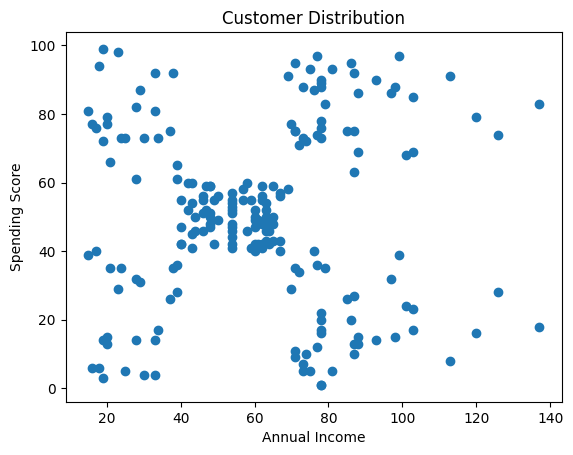

In [ ]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Distribution")
plt.show()

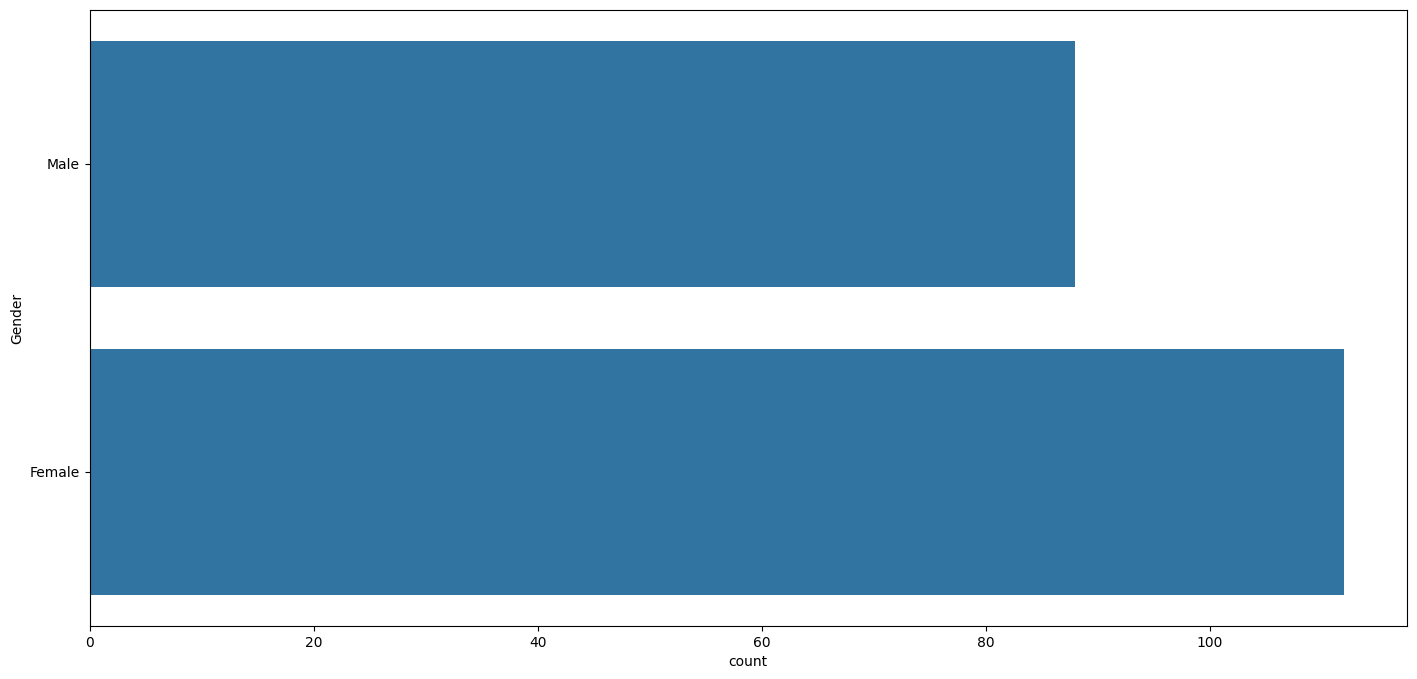

In [ ]:
plt.figure(1,figsize=(17,8))
sns.countplot(y ='Gender',data=df)
plt.show()

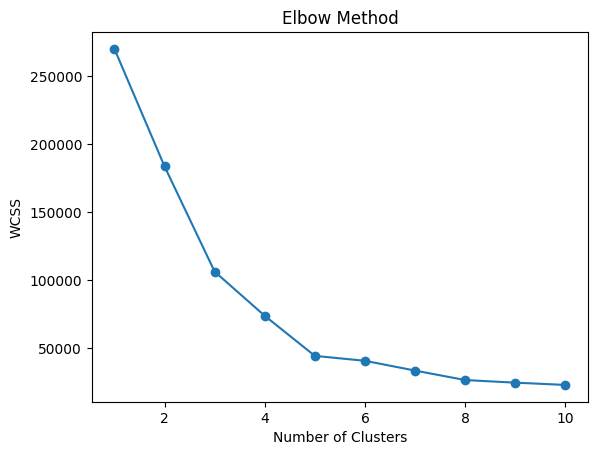

In [ ]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

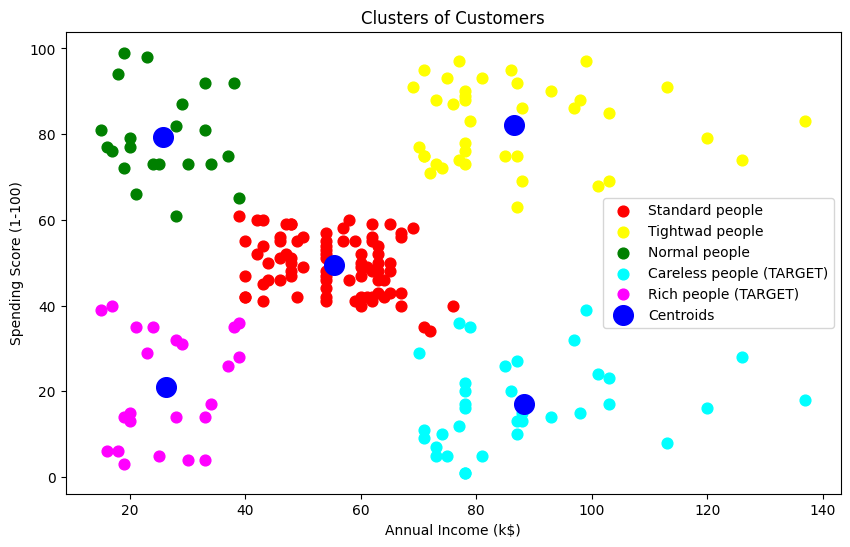

In [ ]:
plt.figure(figsize=(10,6))

colors = ['red', 'yellow', 'green', 'cyan', 'magenta']
labels = ['Standard people','Tightwad people','Normal people',
          'Careless people (TARGET)','Rich people (TARGET)']

for i in range(5):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'],
              df[df['Cluster'] == i]['Spending Score (1-100)'],s=60,c=colors[i],
                label=labels[i])

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=200,
            c='blue',label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
